##Load Libraries and Data:


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
!pip install tensorflow_text
!pip install transformers
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 85.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 120.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 36.1 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Fo

In [ ]:
# install and import necessary libraries.

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Embedding, Input, Dense, Lambda
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K
import tensorflow_datasets as tfds
import tensorflow_text as tf_text

from transformers import BertTokenizer, TFBertModel
from transformers import logging
logging.set_verbosity_error()


import sklearn as sk
from sklearn.model_selection import train_test_split
import os
import nltk
from nltk.data import find
from sklearn.metrics import classification_report

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords, words
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import contractions
import matplotlib.pyplot as plt

import re,string, unicodedata
from bs4 import BeautifulSoup

import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.test.utils import datapath

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
data=pd.read_csv("/content/gdrive/MyDrive/Tweets.csv")
data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [ ]:
data.shape

(14640, 15)

In [ ]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
data.isnull().sum(axis=0)

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [ ]:
df=data.iloc[:,[10, 1]]
df.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [ ]:
pd.set_option('display.max_colwidth', None)# Display full dataframe information (Non-turncated Text column.)
df.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [ ]:
df['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [ ]:
df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [ ]:
#finding maximum length of a tweet
print(df.text.map(lambda x: len(x)).max())

186


<ipython-input-10-b9c0ed441303>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_length'] = df['text'].apply(lambda x: len(x.split()))


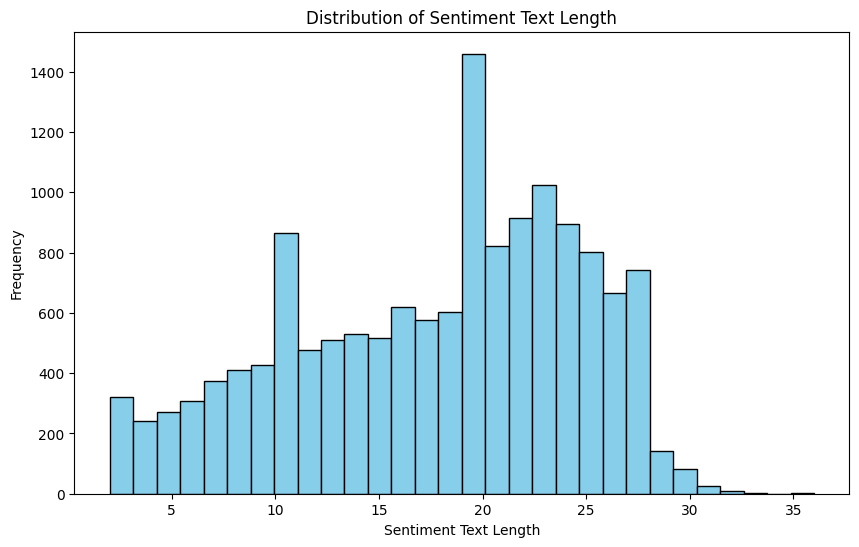

In [ ]:

# Calculate the length of each sentiment text and create a new column 'text_length'
df['text_length'] = df['text'].apply(lambda x: len(x.split()))

# Plot the distribution of sentiment text lengths using a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['text_length'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Sentiment Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Text Length')
plt.show()

##Data Pre-processing:

- Remove html tags.
- Replace contractions in string. (e.g. replace I'm --> I am) and so on.\
- Remove numbers.
- Tokenization
- To remove Stopwords.
- Lemmatized data
- NLTK library to tokenize words , remove stopwords and lemmatize the remaining words.

In [ ]:
# Remove html tags
def strip_html(text):
    if '<' in text:
        soup = BeautifulSoup(text, "html.parser")
        return soup.get_text()
    else:
        return text

df['text'] = df['text'].apply(lambda x: strip_html(x))
df.head()

<ipython-input-11-c054b3bc21df>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: strip_html(x))


,text,airline_sentiment,text_length
0,@VirginAmerica What @dhepburn said.,neutral,4
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive,9
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral,12
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative,17
4,@VirginAmerica and it's a really big bad thing about it,negative,10


In [ ]:
# replace contactions with full word
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

df['text'] = df['text'].apply(lambda x: replace_contractions(x))
df.head()


<ipython-input-12-34de8f4d34fd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: replace_contractions(x))


,text,airline_sentiment,text_length
0,@VirginAmerica What @dhepburn said.,neutral,4
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive,9
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral,12
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative,17
4,@VirginAmerica and it is a really big bad thing about it,negative,10


In [ ]:
# remove numbers
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

df['text'] = df['text'].apply(lambda x: remove_numbers(x))
df.head()

<ipython-input-13-d05ab0a7cea3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: remove_numbers(x))


,text,airline_sentiment,text_length
0,@VirginAmerica What @dhepburn said.,neutral,4
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive,9
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral,12
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative,17
4,@VirginAmerica and it is a really big bad thing about it,negative,10


In [ ]:
#tokenization of data
nltk.download('punkt')
df['text']=df.apply(lambda row:nltk.word_tokenize(row['text']),axis=1)
df.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-14-e220bc904c3c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text']=df.apply(lambda row:nltk.word_tokenize(row['text']),axis=1)


,text,airline_sentiment,text_length
0,"[@, VirginAmerica, What, @, dhepburn, said, .]",neutral,4
1,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]",positive,9
2,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]",neutral,12
3,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, amp, ;, they, have, little, recourse]",negative,17
4,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]",negative,10


In [ ]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))

In [ ]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

df['text'] = df.apply(lambda row: normalize(row['text']), axis=1)
df.head()

<ipython-input-16-6ed2712795c6>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df.apply(lambda row: normalize(row['text']), axis=1)


,text,airline_sentiment,text_length
0,virginamerica dhepburn say,neutral,4
1,virginamerica plus add commercials experience tacky,positive,9
2,virginamerica not today must mean need take another trip,neutral,12
3,virginamerica really aggressive blast obnoxious entertainment guests face amp little recourse,negative,17
4,virginamerica really big bad thing,negative,10


In [ ]:
#@title NLTK & Word2Vec

nltk.download('word2vec_sample')

word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))

model = KeyedVectors.load_word2vec_format(datapath(word2vec_sample), binary=False)

[nltk_data] Downloading package word2vec_sample to /root/nltk_data...
[nltk_data]   Unzipping models/word2vec_sample.zip.


In [ ]:
EMBEDDING_DIM = len(model['delay']) # known and is 300


In [ ]:
# initialize embedding matrix and word-to-id map:
embedding_matrix = np.zeros((len(model) + 1, EMBEDDING_DIM))
vocab_dict = {}

# build the embedding matrix and the word-to-id map:
for i, word in enumerate(model.index_to_key):
    embedding_vector = model[word]

    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
        vocab_dict[word] = i

# set last index at the end of the vocab for unknown tokens
vocab_dict['[UNK]'] = len(vocab_dict)

In [ ]:
embedding_matrix.shape

(43982, 300)

In [ ]:
embedding_matrix[:5, :5]

array([[ 0.0891758 ,  0.121832  , -0.0671959 ,  0.0477279 , -0.013659  ],
       [ 0.0526281 ,  0.013157  , -0.010104  ,  0.0540819 ,  0.0386715 ],
       [ 0.0786419 ,  0.0373911 , -0.0131472 ,  0.0347375 ,  0.0288273 ],
       [-0.00157585, -0.0564239 ,  0.00320281,  0.0422498 ,  0.15264399],
       [ 0.0356899 , -0.00367283, -0.065534  ,  0.0213832 ,  0.00788408]])

In [ ]:
#@title train - test split
# Split the DataFrame into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Create TensorFlow datasets from the train and test DataFrames
train_data = tf.data.Dataset.from_tensor_slices((train_df['text'].values, train_df['airline_sentiment'].values))
test_data = tf.data.Dataset.from_tensor_slices((test_df['text'].values, test_df['airline_sentiment'].values))

# Batch the train and test data
train_data = train_data.batch(20000)
test_data = test_data.batch(5000)

# Get the examples and labels from the first batch of train and test data
train_examples, train_labels = next(iter(train_data))
test_examples, test_labels = next(iter(test_data))


In [ ]:
train_examples[:4]

<tf.Tensor: shape=(4,), dtype=string, numpy=
array([b'unite offer us room people fail',
       b'jetblue jfk nyc staff amaze lax jetblue send email detail disappoint experience jetbluecheeps',
       b'jetblue well last update right direction least keep finger cross',
       b'americanair flight still sit dfw wait baggage load'],
      dtype=object)>

In [ ]:
train_labels[:4]

<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'negative', b'negative', b'positive', b'negative'], dtype=object)>

In [ ]:
MAX_SEQUENCE_LENGTH = 35

**Data Preparation
Training/Test Sets for Word2Vec-based Models**

In [ ]:
tokenizer = tf_text.WhitespaceTokenizer()
train_tokens = tokenizer.tokenize(train_examples)
test_tokens = tokenizer.tokenize(test_examples)

In [ ]:
train_tokens[0]

<tf.Tensor: shape=(6,), dtype=string, numpy=
array([b'unite', b'offer', b'us', b'room', b'people', b'fail'],
      dtype=object)>

In [ ]:
def docs_to_vocab_ids(tokenized_texts_list):
    """
    converting a list of strings to a list of lists of word ids
    """
    texts_vocab_ids = []
    text_labels = []
    valid_example_list = []
    for i, token_list in enumerate(tokenized_texts_list):

        # Get the vocab id for each token in this doc ([UNK] if not in vocab)
        vocab_ids = []
        for token in list(token_list.numpy()):
            decoded = token.decode('utf-8', errors='ignore')
            if decoded in vocab_dict:
                vocab_ids.append(vocab_dict[decoded])
            else:
                vocab_ids.append(vocab_dict['[UNK]'])

        # Truncate text to max length, add padding up to max length
        vocab_ids = vocab_ids[:MAX_SEQUENCE_LENGTH]
        n_padding = (MAX_SEQUENCE_LENGTH - len(vocab_ids))
        # For simplicity in this model, we'll just pad with unknown tokens
        vocab_ids += [vocab_dict['[UNK]']] * n_padding
        # Add this example to the list of converted docs
        texts_vocab_ids.append(vocab_ids)

        if i % 5000 == 0:
            print('Examples processed: ', i)

    print('Total examples: ', i)
    return np.array(texts_vocab_ids)


In [ ]:
train_input_ids = docs_to_vocab_ids(train_tokens)
test_input_ids = docs_to_vocab_ids(test_tokens)

train_input_labels = np.array(train_labels)
test_input_labels = np.array(test_labels)

Examples processed:  0
Examples processed:  5000
Examples processed:  10000
Total examples:  11711
Examples processed:  0
Total examples:  2927


In [ ]:
train_input_ids[:2]

array([[20803, 33581, 12050,  5585, 25266, 11340, 43981, 43981, 43981,
        43981, 43981, 43981, 43981, 43981, 43981, 43981, 43981, 43981,
        43981, 43981, 43981, 43981, 43981, 43981, 43981, 43981, 43981,
        43981, 43981, 43981, 43981, 43981, 43981, 43981, 43981],
       [43981, 43981, 43981, 29908, 39067, 35805, 43981, 13053, 43981,
         5293, 43981,  1470, 43981, 43981, 43981, 43981, 43981, 43981,
        43981, 43981, 43981, 43981, 43981, 43981, 43981, 43981, 43981,
        43981, 43981, 43981, 43981, 43981, 43981, 43981, 43981]])

In [ ]:
# Convert sentiment labels to regular strings
train_labels = [label.decode('utf-8') for label in train_input_labels]
test_labels = [label.decode('utf-8') for label in test_input_labels]

# Create a dictionary to map sentiment labels to integer values
label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}

# Convert sentiment labels to integer values using the label mapping
train_labels_int = [label_mapping[label] for label in train_labels]
test_labels_int = [label_mapping[label] for label in test_labels]

# Convert labels to one-hot encoding for multiclass classification
train_labels_onehot = tf.keras.utils.to_categorical(train_labels_int)
test_labels_onehot = tf.keras.utils.to_categorical(test_labels_int)

# Convert one-hot encoded labels to integer labels
train_labels_0 = tf.argmax(train_labels_onehot, axis=1)
test_labels= tf.argmax(test_labels_onehot, axis=1)



In [ ]:
# train and validation split
valid_ids=train_input_ids[9000:]
valid_labels=train_labels_0[9000:]
train_input_ids=train_input_ids[:9000]
train_labels=train_labels_0[:9000]

In [ ]:
def build_rnn_model(rnn_dim, dense_layer_dims, dropout_rate, num_classes, embeddings_trainable=False):
    rnn_input_layer = tf.keras.layers.Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int64')
    rnn_embedding_layer = tf.keras.layers.Embedding(embedding_matrix.shape[0],
                                                    embedding_matrix.shape[1],
                                                    embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix),
                                                    input_length=MAX_SEQUENCE_LENGTH,
                                                    trainable=embeddings_trainable)
    rnn_embeddings = rnn_embedding_layer(rnn_input_layer)

    # Return the sequence of outputs from the RNN calculation
    rnn_output = tf.keras.layers.LSTM(rnn_dim, return_sequences=True, name='LSTM')(rnn_embeddings)

    # Apply pooling operation to obtain a fixed-length representation of the sequence
    rnn_output = tf.keras.layers.GlobalMaxPooling1D()(rnn_output)

    last_hidden_output = rnn_output

    for dense_layer_dim in dense_layer_dims:
        last_hidden_output = tf.keras.layers.Dense(dense_layer_dim, activation='relu')(last_hidden_output)
        last_hidden_output = tf.keras.layers.Dropout(rate=dropout_rate)(last_hidden_output)

    rnn_prediction = tf.keras.layers.Dense(num_classes, activation='softmax')(last_hidden_output)

    rnn_model = tf.keras.Model(inputs=rnn_input_layer, outputs=rnn_prediction)
    rnn_model.compile(optimizer='adam',
                      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                      metrics=['accuracy'])
    return rnn_model


In [ ]:
# Define the model
W2V_RNN_model = build_rnn_model(rnn_dim=128, dense_layer_dims=[64], dropout_rate=0.2, num_classes=3, embeddings_trainable=False)

In [ ]:
W2V_RNN_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60)]              0         
                                                                 
 embedding (Embedding)       (None, 60, 300)           13194600  
                                                                 
 LSTM (LSTM)                 (None, 60, 128)           219648    
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                             

In [ ]:
W2V_RNN_model_history = W2V_RNN_model.fit(train_input_ids,
                                                  train_labels,
                                                  validation_data=(valid_ids,valid_labels),
                                                  batch_size=8,
                                                  epochs=5,
                                                  verbose=2)

Epoch 1/5
1125/1125 - 68s - loss: 0.6380 - accuracy: 0.7432 - val_loss: 0.5799 - val_accuracy: 0.7659 - 68s/epoch - 60ms/step
Epoch 2/5
1125/1125 - 57s - loss: 0.5381 - accuracy: 0.7881 - val_loss: 0.5396 - val_accuracy: 0.7898 - 57s/epoch - 51ms/step
Epoch 3/5
1125/1125 - 53s - loss: 0.4985 - accuracy: 0.8049 - val_loss: 0.5447 - val_accuracy: 0.7777 - 53s/epoch - 47ms/step
Epoch 4/5
1125/1125 - 54s - loss: 0.4610 - accuracy: 0.8186 - val_loss: 0.5277 - val_accuracy: 0.7950 - 54s/epoch - 48ms/step
Epoch 5/5
1125/1125 - 57s - loss: 0.4109 - accuracy: 0.8429 - val_loss: 0.5315 - val_accuracy: 0.7990 - 57s/epoch - 51ms/step


In [ ]:
score = W2V_RNN_model.evaluate(test_input_ids, test_labels)

92/92 [==============================] - 3s 29ms/step - loss: 0.5191 - accuracy: 0.7906


In [ ]:
from sklearn.metrics import accuracy_score

# Predict sentiment labels for the test data
predictions = W2V_RNN_model.predict(test_input_ids)
predicted_labels = tf.argmax(predictions, axis=1)

# Calculate accuracy
accuracy_test = accuracy_score(test_labels, predicted_labels)
print("Accuracy-test:", accuracy_test)

92/92 [==============================] - 4s 41ms/step
Accuracy-test: 0.7906420765027322


In [ ]:
print(classification_report(test_labels, predicted_labels.numpy(), target_names=label_mapping.keys()))

              precision    recall  f1-score   support

    negative       0.88      0.86      0.87      1889
     neutral       0.60      0.59      0.60       580
    positive       0.68      0.75      0.71       459

    accuracy                           0.79      2928
   macro avg       0.72      0.73      0.73      2928
weighted avg       0.79      0.79      0.79      2928



In [ ]:
def build_bilstm_model(rnn_dim, dense_layer_dims, dropout_rate, num_classes, embeddings_trainable=False):
    rnn_input_layer = tf.keras.layers.Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int64')
    rnn_embedding_layer = tf.keras.layers.Embedding(embedding_matrix.shape[0],
                                                    embedding_matrix.shape[1],
                                                    embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix),
                                                    input_length=MAX_SEQUENCE_LENGTH,
                                                    trainable=embeddings_trainable)
    rnn_embeddings = rnn_embedding_layer(rnn_input_layer)

    # Return the sequence of outputs from the Bidirectional LSTM calculation
    rnn_output = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(rnn_dim, return_sequences=True), name='BiLSTM')(rnn_embeddings)

    # Apply pooling operation to obtain a fixed-length representation of the sequence
    rnn_output = tf.keras.layers.GlobalMaxPooling1D()(rnn_output)

    last_hidden_output = rnn_output

    for dense_layer_dim in dense_layer_dims:
        last_hidden_output = tf.keras.layers.Dense(dense_layer_dim, activation='relu')(last_hidden_output)
        last_hidden_output = tf.keras.layers.Dropout(rate=dropout_rate)(last_hidden_output)

    rnn_prediction = tf.keras.layers.Dense(num_classes, activation='softmax')(last_hidden_output)

    rnn_model = tf.keras.Model(inputs=rnn_input_layer, outputs=rnn_prediction)
    rnn_model.compile(optimizer='adam',
                      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                      metrics=['accuracy'])
    return rnn_model



In [ ]:
# Define the model
W2V_BiLSTM_model = build_bilstm_model(rnn_dim=128, dense_layer_dims=[64], dropout_rate=0.2, num_classes=3, embeddings_trainable=False)

In [ ]:
W2V_BiLSTM_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 35)]              0         
                                                                 
 embedding (Embedding)       (None, 35, 300)           13194600  
                                                                 
 BiLSTM (Bidirectional)      (None, 35, 256)           439296    
                                                                 
 global_max_pooling1d (Glob  (None, 256)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                             

In [ ]:
W2V_BiLSTM_model_history = W2V_BiLSTM_model.fit(train_input_ids,
                                                train_labels,
                                                validation_data=(valid_ids, valid_labels),
                                                batch_size=8,
                                                epochs=5,
                                                verbose=2)

Epoch 1/5
1125/1125 - 80s - loss: 0.6254 - accuracy: 0.7487 - val_loss: 0.5461 - val_accuracy: 0.7854 - 80s/epoch - 71ms/step
Epoch 2/5
1125/1125 - 78s - loss: 0.5249 - accuracy: 0.7942 - val_loss: 0.5273 - val_accuracy: 0.7920 - 78s/epoch - 70ms/step
Epoch 3/5
1125/1125 - 88s - loss: 0.4770 - accuracy: 0.8177 - val_loss: 0.5170 - val_accuracy: 0.8049 - 88s/epoch - 78ms/step
Epoch 4/5
1125/1125 - 86s - loss: 0.4245 - accuracy: 0.8362 - val_loss: 0.5494 - val_accuracy: 0.7976 - 86s/epoch - 77ms/step
Epoch 5/5
1125/1125 - 84s - loss: 0.3704 - accuracy: 0.8621 - val_loss: 0.5434 - val_accuracy: 0.7924 - 84s/epoch - 75ms/step


In [ ]:
score2 = W2V_BiLSTM_model.evaluate(test_input_ids, test_labels)

92/92 [==============================] - 9s 87ms/step - loss: 0.5358 - accuracy: 0.7927


In [ ]:
from sklearn.metrics import accuracy_score

# Predict sentiment labels for the test data
predictions2 = W2V_BiLSTM_model.predict(test_input_ids)
predicted_labels2 = tf.argmax(predictions2, axis=1)

# Calculate accuracy
accuracy_test = accuracy_score(test_labels, predicted_labels2)
print("Accuracy-test:", accuracy_test)

92/92 [==============================] - 5s 46ms/step
Accuracy-test: 0.792691256830601


In [ ]:
print(classification_report(test_labels, predicted_labels2.numpy(), target_names=label_mapping.keys()))

              precision    recall  f1-score   support

    negative       0.88      0.87      0.87      1889
     neutral       0.62      0.56      0.59       580
    positive       0.66      0.77      0.71       459

    accuracy                           0.79      2928
   macro avg       0.72      0.73      0.72      2928
weighted avg       0.79      0.79      0.79      2928



**Data Preparation
Training/Test Sets for BERT-based Models**


In [ ]:
valid_examples_bert_tf=train_examples[9000:]
valid_lables_bert_tf=train_labels_0[9000:]
train_examples_bert_tf=train_examples[:9000]
train_lables_bert_tf=train_labels_0[:9000]


In [ ]:
# Convert data to regular strings
train_examples_bert = [example.decode('utf-8') for example in train_examples_bert_tf.numpy()]
valid_examples_bert = [example.decode('utf-8') for example in valid_examples_bert_tf.numpy()]
test_examples_bert = [example.decode('utf-8') for example in test_examples.numpy()]

In [ ]:
valid_lables_bert_tf

<tf.Tensor: shape=(2712,), dtype=int64, numpy=array([2, 0, 0, ..., 0, 0, 1])>

In [ ]:
# since the data is cleaned and all are in lower case letters
model_checkpoint = 'bert-base-uncased'

In [ ]:
bert_tokenizer = BertTokenizer.from_pretrained(model_checkpoint)
bert_model = TFBertModel.from_pretrained(model_checkpoint)

In [ ]:
max_length = 35

In [ ]:
train_examples_bert[0]

'unite offer us room people fail'

In [ ]:
# tokenize the dataset, truncate when passed `max_length`,
# and pad with 0's when less than `max_length` and return a tf Tensor
train_encodings = bert_tokenizer(train_examples_bert, truncation=True, padding='max_length',max_length=max_length, return_tensors='tf')
valid_encodings = bert_tokenizer(valid_examples_bert, truncation=True, padding='max_length',max_length=max_length, return_tensors='tf')
test_encodings = bert_tokenizer(test_examples_bert, truncation=True, padding='max_length',max_length=max_length, return_tensors='tf')

In [ ]:
test_encodings.input_ids[:1]

<tf.Tensor: shape=(1, 35), dtype=int32, numpy=
array([[  101,  4943, 11215,  2220,  2392, 23195,  2190,  8582,  7436,
         2015,   102,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0]],
      dtype=int32)>

In [ ]:
def create_bert_multiclass_model(checkpoint=model_checkpoint,
                                 num_classes=3,
                                 hidden_size=100,
                                 dropout=0.5,
                                 learning_rate=0.00001):
    """
    Build a simple multiclass classification model with BERT. Use the Pooler Output for classification purposes.
    """
    bert_model = TFBertModel.from_pretrained(checkpoint)

   # Set all BERT layers trainable
    bert_model.trainable = True

    input_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int64, name='input_ids_layer')
    token_type_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int64, name='token_type_ids_layer')
    attention_mask = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int64, name='attention_mask_layer')

    bert_inputs = {'input_ids': input_ids,
                   'token_type_ids': token_type_ids,
                   'attention_mask': attention_mask}

    bert_output = bert_model(bert_inputs)
    pooler_output = bert_output.pooler_output

    hidden = tf.keras.layers.Dense(hidden_size, activation='relu', name='hidden_layer')(pooler_output)
    hidden = tf.keras.layers.Dropout(dropout)(hidden)

    classification = tf.keras.layers.Dense(num_classes, activation='softmax', name='classification_layer')(hidden)

    classification_model = tf.keras.Model(inputs=[input_ids, token_type_ids, attention_mask], outputs=[classification])

    classification_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                                 metrics=['accuracy'])

    return classification_model


In [ ]:
pooler_bert_model = create_bert_multiclass_model(checkpoint=model_checkpoint, num_classes=3)

In [ ]:
pooler_bert_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 attention_mask_layer (Inpu  [(None, 170)]                0         []                            
 tLayer)                                                                                          
                                                                                                  
 input_ids_layer (InputLaye  [(None, 170)]                0         []                            
 r)                                                                                               
                                                                                                  
 token_type_ids_layer (Inpu  [(None, 170)]                0         []                            
 tLayer)                                                                                      

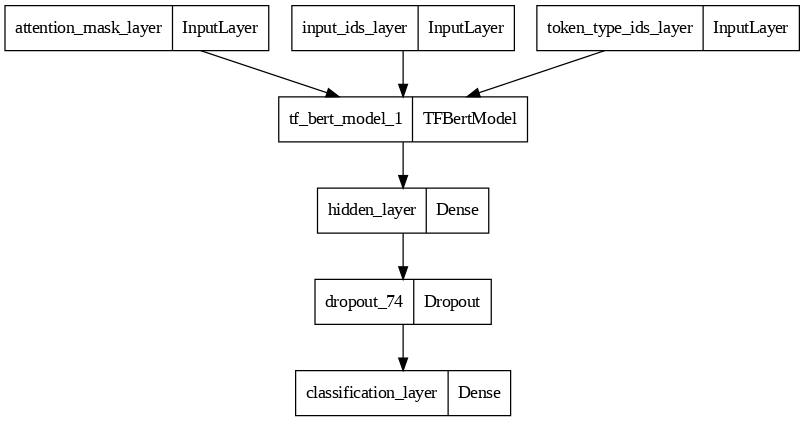

In [ ]:
keras.utils.plot_model(pooler_bert_model, show_shapes=False, show_dtype=False, show_layer_names=True, dpi=90)

In [ ]:
pooler_bert_model_history = pooler_bert_model.fit([train_encodings.input_ids, train_encodings.token_type_ids, train_encodings.attention_mask],
                                                  train_lables_bert_tf,
                                                  validation_data=([valid_encodings.input_ids, valid_encodings.token_type_ids, valid_encodings.attention_mask],
                                                  valid_lables_bert_tf),
                                                  batch_size=32,
                                                  epochs=3,
                                                  verbose=2)

Epoch 1/3
282/282 - 4767s - loss: 0.7195 - accuracy: 0.7049 - val_loss: 0.5238 - val_accuracy: 0.7935 - 4767s/epoch - 17s/step
Epoch 2/3
282/282 - 4699s - loss: 0.5304 - accuracy: 0.7960 - val_loss: 0.5178 - val_accuracy: 0.7939 - 4699s/epoch - 17s/step
Epoch 3/3
282/282 - 4558s - loss: 0.4547 - accuracy: 0.8281 - val_loss: 0.5484 - val_accuracy: 0.8116 - 4558s/epoch - 16s/step


In [ ]:
#Run and evaluate against the fine-tuned model. This will give an overall accuracy based on the test set

score = pooler_bert_model.evaluate([test_encodings.input_ids, test_encodings.token_type_ids, test_encodings.attention_mask],
                                                  test_labels)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

92/92 [==============================] - 448s 5s/step - loss: 0.5119 - accuracy: 0.8149
Test loss: 0.5118528604507446
Test accuracy: 0.8148906826972961


In [ ]:
#run and capture all predictions from our test set using model.predict

model=pooler_bert_model
predictions_model1=model.predict([test_encodings.input_ids, test_encodings.token_type_ids, test_encodings.attention_mask])


#now we need to get the highest probability in the distribution for each prediction
#and store that in a tf.Tensor
predictions_model1 = tf.argmax(predictions_model1, axis=-1)
predictions_model1

92/92 [==============================] - 437s 5s/step


<tf.Tensor: shape=(2928,), dtype=int64, numpy=array([2, 0, 0, ..., 1, 1, 0])>

In [ ]:
print(classification_report(test_labels, predictions_model1.numpy())) #, target_names=target_names))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      1889
           1       0.68      0.50      0.58       580
           2       0.74      0.80      0.77       459

    accuracy                           0.81      2928
   macro avg       0.76      0.74      0.74      2928
weighted avg       0.81      0.81      0.81      2928



In [ ]:
from transformers import TFBertModel

def create_bert_multiclass_model_with_bilstm(checkpoint=model_checkpoint,
                                            num_classes=3,
                                            hidden_size=100,
                                            lstm_units=64,
                                            dropout=0.3,
                                            learning_rate=0.00005,
                                            max_length=max_length):
    """
    Build a multiclass classification model with BERT and BiLSTM combination.
    """
    # Load BERT model
    bert_model = TFBertModel.from_pretrained(checkpoint)

    # Set all BERT layers trainable
    bert_model.trainable = True

    # BERT input layer
    input_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int64, name='input_ids_layer')
    token_type_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int64, name='token_type_ids_layer')
    attention_mask = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int64, name='attention_mask_layer')

    # BERT inputs
    bert_inputs = {'input_ids': input_ids,
                   'token_type_ids': token_type_ids,
                   'attention_mask': attention_mask}

    # BERT output
    bert_output = bert_model(bert_inputs)
    cls_output = bert_output.pooler_output

    # BiLSTM layer
    lstm_output = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_units))(bert_output.last_hidden_state)

    # Concatenate [CLS] token output with BiLSTM output
    concatenated_output = tf.keras.layers.concatenate([cls_output, lstm_output], axis=-1)

    # Dense layer for classification
    hidden = tf.keras.layers.Dense(hidden_size, activation='relu', name='hidden_layer')(concatenated_output)
    hidden = tf.keras.layers.Dropout(dropout)(hidden)
    classification = tf.keras.layers.Dense(num_classes, activation='softmax', name='classification_layer')(hidden)

    # Model
    classification_model = tf.keras.Model(inputs=[input_ids, token_type_ids, attention_mask], outputs=[classification])

    classification_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                                 metrics=['accuracy'])

    return classification_model

In [ ]:
bert_model_bilstm = create_bert_multiclass_model_with_bilstm(checkpoint=model_checkpoint, num_classes=3)

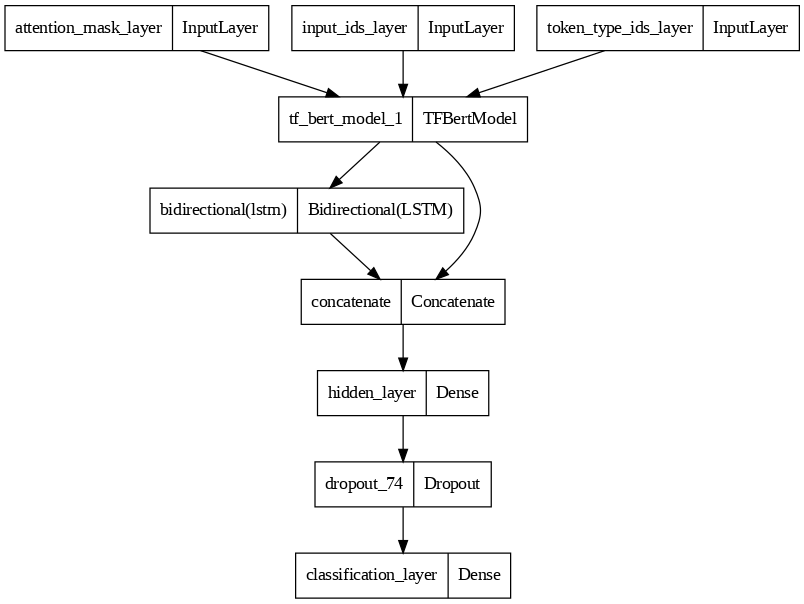

In [ ]:
keras.utils.plot_model(bert_model_bilstm, show_shapes=False, show_dtype=False, show_layer_names=True, dpi=90)

In [ ]:
bert_model__bilstm_history = bert_model_bilstm.fit([train_encodings.input_ids, train_encodings.token_type_ids, train_encodings.attention_mask],
                                                  train_lables_bert_tf,
                                                  validation_data=([valid_encodings.input_ids, valid_encodings.token_type_ids, valid_encodings.attention_mask],
                                                  valid_lables_bert_tf),
                                                  batch_size=64,
                                                  epochs=3,
                                                  verbose=2               )

Epoch 1/3
141/141 - 4539s - loss: 0.6459 - accuracy: 0.7354 - val_loss: 0.5374 - val_accuracy: 0.7957 - 4539s/epoch - 32s/step
Epoch 2/3
141/141 - 4470s - loss: 0.4463 - accuracy: 0.8287 - val_loss: 0.4822 - val_accuracy: 0.8145 - 4470s/epoch - 32s/step
Epoch 3/3
141/141 - 4446s - loss: 0.3113 - accuracy: 0.8876 - val_loss: 0.5558 - val_accuracy: 0.8086 - 4446s/epoch - 32s/step


In [ ]:
#Run and evaluate against the fine-tuned model. This will give an overall accuracy based on the test set

score_bilstm = bert_model_bilstm.evaluate([test_encodings.input_ids, test_encodings.token_type_ids, test_encodings.attention_mask],
                                                  test_labels)

print('Test loss:', score_bilstm3[0])
print('Test accuracy:', score_bilstm3[1])

92/92 [==============================] - 434s 5s/step - loss: 0.5394 - accuracy: 0.8125
Test loss: 0.5393621325492859
Test accuracy: 0.8125


In [ ]:
#run and capture all predictions from our test set using model.predict

model_bilstm=bert_model_bilstm
predictions_model_bilstm=model_bilstm.predict([test_encodings.input_ids, test_encodings.token_type_ids, test_encodings.attention_mask])


#now we need to get the highest probability in the distribution for each prediction
#and store that in a tf.Tensor
predictions_model_bilstm = tf.argmax(predictions_model_bilstm, axis=-1)
predictions_model_bilstm

92/92 [==============================] - 421s 5s/step


<tf.Tensor: shape=(2928,), dtype=int64, numpy=array([2, 0, 0, ..., 1, 1, 0])>

In [ ]:
print(classification_report(test_labels, predictions_model_bilstm.numpy())) #, target_names=target_names))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89      1889
           1       0.62      0.64      0.63       580
           2       0.72      0.79      0.76       459

    accuracy                           0.81      2928
   macro avg       0.75      0.77      0.76      2928
weighted avg       0.82      0.81      0.81      2928



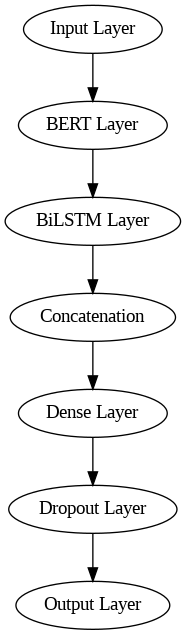

In [ ]:
import graphviz
from IPython.display import display, Image

# Create a Graph
graph = graphviz.Digraph(format='png', engine='dot')

# Add nodes
nodes = ['Input Layer', 'BERT Layer', 'BiLSTM Layer', 'Concatenation', 'Dense Layer', 'Dropout Layer', 'Output Layer']
for node in nodes:
    graph.node(node)

# Add edges
edges = [('Input Layer', 'BERT Layer'),
         ('BERT Layer', 'BiLSTM Layer'),
         ('BiLSTM Layer', 'Concatenation'),
         ('Concatenation', 'Dense Layer'),
         ('Dense Layer', 'Dropout Layer'),
         ('Dropout Layer', 'Output Layer')]
for edge in edges:
    graph.edge(*edge)

# Render and display the graph
graph.render('architecture_diagram', view=False)

# Display the generated image
display(Image('architecture_diagram.png'))
